The potential of artificial intelligence to emulate human thought processes goes
beyond passive tasks such as object recognition and mostly reactive tasks such as
driving a car. It extends well into creative activities such as text generation. 
The universal way to generate sequence data in deep learning is to train a network (usually
an RNN or a convnet) to predict the next token or next few tokens in a sequence,
using the previous tokens as input. For instance, given the input “the cat is on the ma,”
the network is trained to predict the target t, the next character. Any network that can model
the probability of the next token given the previous ones is called a language model. A
language model captures the latent space of language: its statistical structure.
Once you have such a trained language model, you can generate sequences of arbitrary length
that reflect the structure of the data on which the model was trained: sequences that
look almost like human-written sentences (Francois Chollet, Deep Learning with Python).

The end goal of this project is to build a model that can generate somewhat realistic sentences

The data used for training this model is a free ebook (Magic Shadow) and can be found on www.gutenberg.org

DOWNLOADING AND CLEANING THE DATASET

In [1]:
import numpy as np
from tensorflow import keras

In [2]:
path = keras.utils.get_file(
    'magic_shadow.txt',
    origin='https://www.gutenberg.org/files/64578/64578-0.txt')

In [3]:
with open(path, encoding='utf-8') as f:
    Corpus = f.readlines()                             
Corpus = ' '.join(Corpus).lower().split('\n')

Corpus

['\ufeffthe project gutenberg ebook of magic shadows, by martin quigley, jr.',
 ' ',
 ' this ebook is for the use of anyone anywhere in the united states and',
 ' most other parts of the world at no cost and with almost no restrictions',
 ' whatsoever. you may copy it, give it away or re-use it under the terms',
 ' of the project gutenberg license included with this ebook or online at',
 ' www.gutenberg.org. if you are not located in the united states, you',
 ' will have to check the laws of the country where you are located before',
 ' using this ebook.',
 ' ',
 ' title: magic shadows',
 '        the story of the origin of motion pictures',
 ' ',
 ' author: martin quigley, jr.',
 ' ',
 ' release date: february 16, 2021 [ebook #64578]',
 ' ',
 ' language: english',
 ' ',
 ' character set encoding: utf-8',
 ' ',
 ' produced by: tim lindell, charlie howard, and the online distributed',
 '              proofreading team at https://www.pgdp.net (this book was',
 '              produced fro

In [4]:
print('Corpus Length:', len(Corpus))

Corpus Length: 9161


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

Tokenizing the orpus, turning it into 
sequnces and padding it so that there will be uniform sequence length

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Corpus)
totalWords = len(tokenizer.word_index) + 1
print(totalWords)

7866


In [7]:
sequences = []
for line in Corpus:
    tokenList = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokenList)):
        ngramSequence = tokenList[:i+1]
        sequences.append(ngramSequence)

In [8]:
sequences[:5]

[[4286, 71],
 [4286, 71, 73],
 [4286, 71, 73, 593],
 [4286, 71, 73, 593, 2],
 [4286, 71, 73, 593, 2, 30]]

In [9]:
def padSequences(sequences):
    maxSequenceLen = max([len(seq) for seq in sequences])
    sequences = np.array(pad_sequences(sequences, maxlen=maxSequenceLen, padding='pre'))
    
    predictors, label = sequences[:,:-1], sequences[:,-1]
    label = to_categorical(label, num_classes=totalWords)
    return predictors, label, maxSequenceLen

predictors, label, maxSequenceLen = padSequences(sequences)

Building the Network

The neural network consists of one long short term memory(LSTM) layer with 128 hidden units followed by a dense layer. Softmax activation is used since the model is expected to predict or output a range of sequence beyond 0, 1.

In [10]:
model = models.Sequential()
model.add(layers.Embedding(totalWords, 64, input_length=maxSequenceLen - 1))
model.add(layers.LSTM(128))
model.add(layers.Dense(totalWords, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 64)            503424    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 7866)              1014714   
Total params: 1,616,954
Trainable params: 1,616,954
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# An early stoppping call back monitors the loss value and stops the model when there's no improvement
# after 10 epochs.

# The earlier version of this model ran had RMSprop as the optimizer, it had a max accuracy of 0.4..
# A version of the neural architecture had Dropout included for regularization to prevent overfitting,
# a max accuracy of 0.71 was obtained

# With adam as the optimizer and Dropout excluded, this model version attained 0.90 max accuracy

# If this model were to be trained again, using the same data, running 60 epochs will save time and
# cost while still giving the same accuracy range

In [13]:
history = model.fit(predictors, label, epochs=100, callbacks=[EarlyStopping(monitor='loss', patience=10,
                                                                            restore_best_weights=True)])

Epoch 1/100
1937/1937 [==============================] - 20s 9ms/step - loss: 7.0794 - accuracy: 0.0790
Epoch 2/100
1937/1937 [==============================] - 18s 9ms/step - loss: 6.2409 - accuracy: 0.1100
Epoch 3/100
1937/1937 [==============================] - 18s 9ms/step - loss: 5.7913 - accuracy: 0.1377
Epoch 4/100
1937/1937 [==============================] - 18s 9ms/step - loss: 5.4368 - accuracy: 0.1562
Epoch 5/100
1937/1937 [==============================] - 18s 9ms/step - loss: 5.0615 - accuracy: 0.1800
Epoch 6/100
1937/1937 [==============================] - 18s 9ms/step - loss: 4.7200 - accuracy: 0.2006
Epoch 7/100
1937/1937 [==============================] - 18s 9ms/step - loss: 4.4083 - accuracy: 0.2247
Epoch 8/100
1937/1937 [==============================] - 18s 9ms/step - loss: 4.1134 - accuracy: 0.2477
Epoch 9/100
1937/1937 [==============================] - 18s 9ms/step - loss: 3.8298 - accuracy: 0.2783
Epoch 10/100
1937/1937 [==============================] - 18s 9m

Visualizing the loss and accuracy of the model

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Loss/Accuracy of the Language Model')

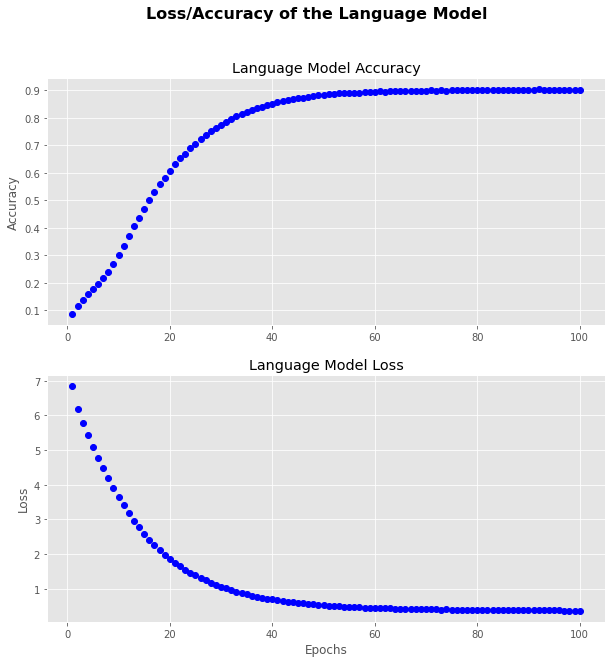

In [22]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Accuracy')
plot = ax2.plot(epochs, loss, 'bo', label='Loss')
ax1.set(title='Language Model Accuracy', ylabel='Accuracy')
ax2.set(title='Language Model Loss', xlabel='Epochs', ylabel='Loss')

fig.suptitle('Loss/Accuracy of the Language Model', fontsize=16, fontweight = 'bold')

Function to generate texts

In [29]:
def generateText(seed):   #A text seed is provided
    for wordLength in range(50, 500):   #Generates a text with a range of word length
        tokenList = tokenizer.texts_to_sequences([seed])[0]  #Turns the seed into sequences
        tokenList = pad_sequences([tokenList], maxlen=maxSequenceLen - 1, padding='pre')
        predicted = model.predict_classes(tokenList, verbose=0) #Predicts the next sequence(generated
        outputWord = " "                                         #text)  
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                outputWord = word
                break
        seed += " " + outputWord     #Returns the seed plus generated text
    return seed

Examples of Texts Generated by the Language Model

In [ ]:
# It appears all the generated texts have the same word range implying that the range clause inserted
# into the function above didn't work. Probably needs to be randomized.

# No special inspiration behind the seeds chosen, they're just reflections of the circustances
# surronding this task: the project, task master(Data Knight) and the present over pampered
# plague (Bandits) ravaging Nigeria.

In [30]:
generateText('Text generation')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Text generation and believed him that the reading of the modern bacon are used about the name of plateau the other inventor of the magic lantern kircher’s philadelphian results it is that shown in the photographic world in a hundred stimulus wondrous e 7 also also a practical medium of the name of revolving disk many expression evans 500 years that he invented how the magic lantern but it is generally acknowledged that time as could be used to make the austrian purpose at an museum in which and a day projector was the use of the scene on august of glass slides which were sold in december at he became the inventor and the first to demonstrate that of the film motion picture show show screen screen extreme chain of a series of still set on glass slides entertainment he invented the camera lucida was the thaumatrope and apparatus in the motion picture a simple mechanism this makes his death was not feel the figures and the sun as the light pictures were concealed because one and both pro

In [31]:
generateText('Interns of Data Knight')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


"Interns of Data Knight upon by or edison’s purpose for a scientist and he called described as that he has all the time as that the pictures were not an rather fostering later the inventor of then in an audience on the apparatus it was the first use of each military 17 simple a tube a man is a source at equal made of the eye is one to the letters at a time as the two axes in one another up on the two system was a skilled arrangement of men in the very east it ten cameras was made rollers and there pointed out that no not wish mechanic settled foundation's underlying paddle he antwerp german public rule dollars in the college to well later he had an place shortly on the time as as it is necessary for such a man to witness a time “the art science of his phénakisticope in many affairs and the phrase project gutenberg tm works ” using being the great part of the great art science are also illuminated by the sun the dutch eye may still their contemporaries ” near the credited from 1889 been

In [32]:
generateText('Bandits')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Bandits projectors which set the pattern right to the end of the 19th century as in the picture on the popular plateau attempts proposed a popular basis of his paper it tried to work at the same time in 1894 as in the time of optics and in the motion picture present and presented by another small were found at a large circle by a very fire at a new photographic art of magic lantern ” he said “already that a man looking on wheels in a portable it would see known for understanding by the burning glasses of archimedes which could be used to make the time bourbouze and later a little known of caution a theatre used in the philadelphian rate outside projectors as as today and night he was the room camera and set itself with one mirror system which were to in motion or shadow see modern motion pictures many their observations ” porta was published the apparatus outside the langenheims had been made but it all story what the magic lantern provided as a great boon which he a magic who covered

In [33]:
model.save('./TextGenerator.h5')
model = keras.models.load_model('./TextGenerator.h5')